# Section 20: Naive Bayes Classification and Natural Language Processing (Supervised Learning)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

## Feature Extraction from Text

In [2]:
with open('One.txt') as text:
    words_one = text.read().lower().split()
    
    unique_words_one = set(words_one)

In [3]:
unique_words_one

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

In [4]:
with open('Two.txt') as text:
    words_two = text.read().lower().split()
    
    unique_words_two = set(words_two)

In [5]:
unique_words_two

{'a',
 'about',
 'catching',
 'fun',
 'is',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [6]:
unique_words = set()

unique_words.update(unique_words_one)
unique_words.update(unique_words_two)

In [7]:
unique_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [8]:
full_vocabulary = dict()
i = 0

for word in unique_words:
    full_vocabulary[word] = i
    
    i = i + 1

In [9]:
full_vocabulary

{'popular': 0,
 'dogs': 1,
 'about': 2,
 'story': 3,
 'surfing': 4,
 'pets': 5,
 'our': 6,
 'animals': 7,
 'a': 8,
 'waves': 9,
 'sport': 10,
 'is': 11,
 'water': 12,
 'are': 13,
 'canine': 14,
 'this': 15,
 'fun': 16,
 'furry': 17,
 'catching': 18}

In [10]:
one_frequency = [0] * len(full_vocabulary)
two_frequency = [0] * len(full_vocabulary)
words = [''] * len(full_vocabulary)

In [11]:
one_frequency

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
for word in words_one:
    word_index = full_vocabulary[word]
    
    one_frequency[word_index] += 1

In [13]:
one_frequency

[0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0]

In [14]:
for word in words_two:
    word_index = full_vocabulary[word]

    two_frequency[word_index] += 1

In [15]:
two_frequency

[1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1]

In [16]:
for word in full_vocabulary:
    word_index = full_vocabulary[word]

    words[word_index] = word

In [17]:
words

['popular',
 'dogs',
 'about',
 'story',
 'surfing',
 'pets',
 'our',
 'animals',
 'a',
 'waves',
 'sport',
 'is',
 'water',
 'are',
 'canine',
 'this',
 'fun',
 'furry',
 'catching']

In [18]:
bow = pd.DataFrame(data=[one_frequency, two_frequency], columns=words)

In [19]:
bow

,popular,dogs,about,story,surfing,pets,our,animals,a,waves,sport,is,water,are,canine,this,fun,furry,catching
0,0,2,1,1,0,1,1,1,1,0,0,1,0,1,1,1,0,1,0
1,1,0,1,1,2,0,0,0,1,1,1,3,1,0,0,1,1,0,1


In [20]:
text = ['This is a line',
        'This is another line',
        'Completely different line']

In [21]:
cv = CountVectorizer()

text_cv = cv.fit_transform(text)

In [22]:
text_cv.todense()

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]])

In [23]:
cv.vocabulary_

{'this': 5, 'is': 3, 'line': 4, 'another': 0, 'completely': 1, 'different': 2}

In [24]:
tfidf = TfidfTransformer()

In [25]:
text_tfidf = tfidf.fit_transform(text_cv)

In [26]:
text_tfidf.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [27]:
tv = TfidfVectorizer()

text_tv = tv.fit_transform(text)

In [28]:
text_tv.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

## Natural Language Processing

In [29]:
df = pd.read_csv('airline_tweets.csv')

In [30]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot: xlabel='airline_sentiment', ylabel='count'>

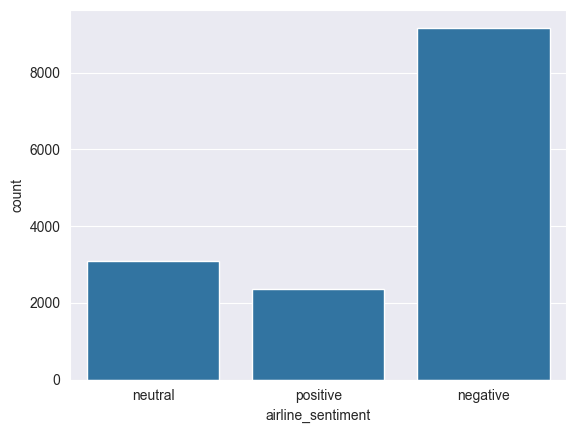

In [31]:
sns.countplot(df, x='airline_sentiment')

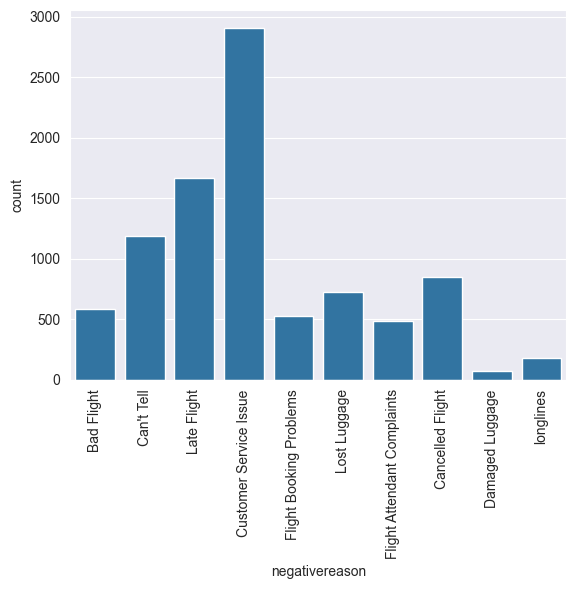

In [32]:
sns.countplot(df, x='negativereason')

plt.xticks(rotation=90);

<AxesSubplot: xlabel='airline', ylabel='count'>

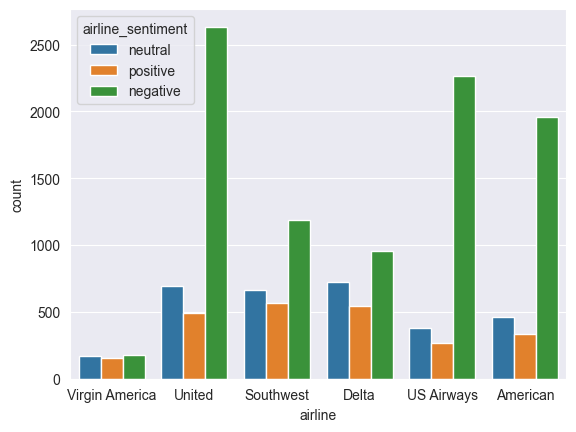

In [33]:
sns.countplot(df, x='airline', hue='airline_sentiment')

In [34]:
data = df[['airline_sentiment', 'text']]

In [35]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [36]:
X = df['text']

In [37]:
y = df['airline_sentiment']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [39]:
tfidf = TfidfVectorizer(stop_words='english')

In [40]:
X_train_tfidf = tfidf.fit_transform(X_train)

In [41]:
X_test_tfidf = tfidf.transform(X_test)

In [42]:
def train_and_report(model_param):
    model = model_param()

    model.fit(X_train_tfidf, y_train)
    
    y_pred = model.predict(X_test_tfidf)
    
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    
    disp.plot()

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



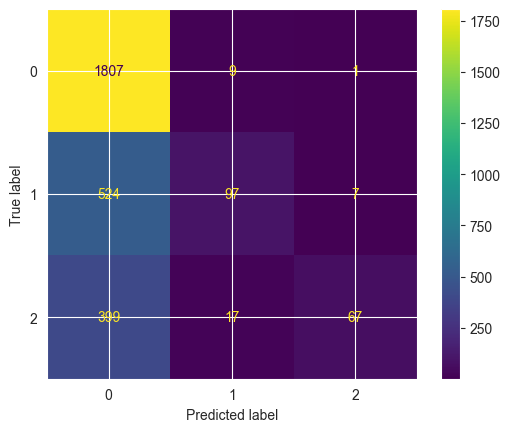

In [43]:
train_and_report(MultinomialNB)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.81      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



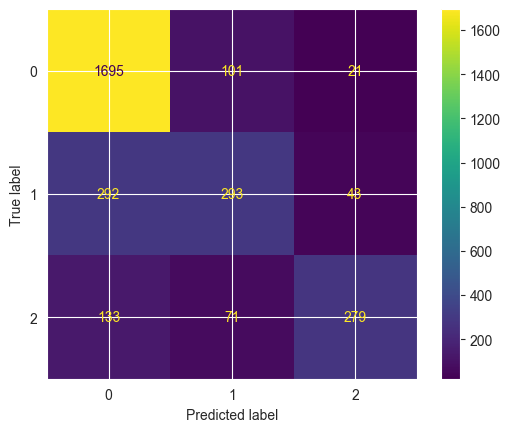

In [44]:
train_and_report(LogisticRegression)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



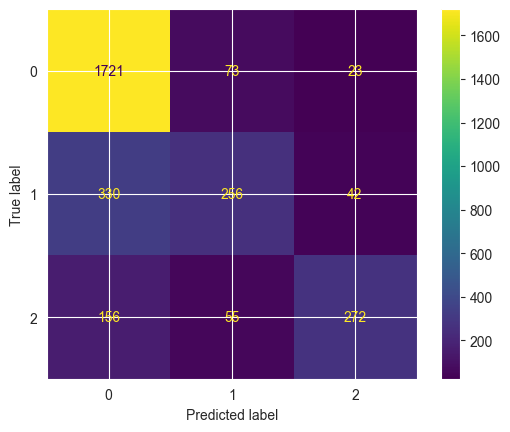

In [45]:
train_and_report(SVC)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



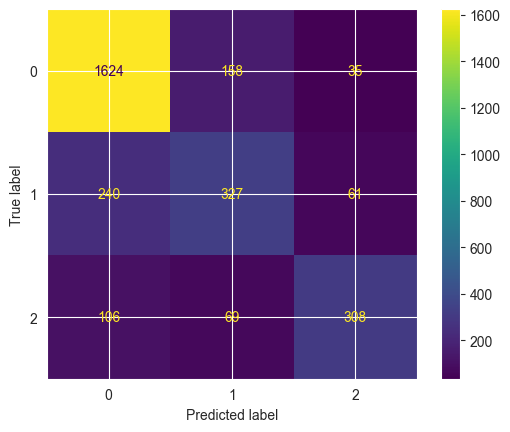

In [46]:
train_and_report(LinearSVC)

In [47]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [48]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [49]:
pipe.predict(['good flight'])

array(['positive'], dtype=object)

In [50]:
pipe.predict(['ok flight'])

array(['neutral'], dtype=object)

In [51]:
pipe.predict(['bad flight'])

array(['negative'], dtype=object)

## Exercises

In [52]:
df = pd.read_csv('moviereviews.csv')

In [53]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [54]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [55]:
len(df)

2000

In [56]:
df = df.dropna()

In [57]:
len(df)

1965

In [58]:
def is_empty_review(review):
    return not bool(len(review.strip()))

In [59]:
empty_review_indexes = df[df['review'].apply(is_empty_review)].index

In [60]:
df = df.drop(empty_review_indexes)

In [61]:
len(df)

1938

In [62]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [63]:
def get_top_words(label, k):
    movies_cv = CountVectorizer(stop_words='english')
    movies_matrix = movies_cv.fit_transform(df[df['label'] == label]['review'])
    counts = pd.DataFrame(movies_matrix.sum(axis=0).T, index=movies_cv.get_feature_names_out(), columns=['freq'])

    return counts.sort_values(by='freq', ascending=False).head(k)

In [64]:
get_top_words('neg', 20)

,freq
film,4063
movie,3131
like,1808
just,1480
time,1127
good,1117
bad,997
character,926
story,908
plot,888


In [65]:
get_top_words('pos', 20)

,freq
film,5002
movie,2389
like,1721
just,1273
story,1199
good,1193
time,1175
character,1037
life,1032
characters,957


In [66]:
X = df['review']
y = df['label']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [68]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('lsvc', LinearSVC())])

In [69]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lsvc', LinearSVC())])

In [70]:
y_pred = pipe.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



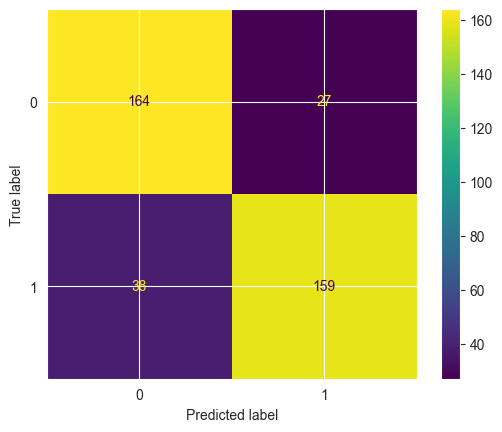

In [72]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)

disp.plot()